In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from dark_shower import dark_shower

In [3]:
# make a dark shower object, specifying the decay portal using the mandatory "portal" flag. 
# The value of this flag must be "photon", "vector", "gluon", "higgs" or "darkphoton"
vector_portal=dark_shower("vector")

darkphoton/vector portal Warning: only most important branching ratios were included. For full list, see 1505.07459


In [4]:
# print out the available decay modes
# W*W*,Z*Z*,ZZ* and WW* modes have been neglected, as they are only relevant for a mass ~ 100 GeV.
for mode in vector_portal.decay_PDG_codes.keys():
    print(mode)

d dbar
u ubar
s sbar
c cbar
b bbar
e+ e-
mu+ mu-
tau+ tau-
pi+ pi-
K+ K-
pi+ pi- pi0
pi+ pi- pi+ pi-
pi+ pi- pi0 pi0


Text(0.5, 1.04, '$\\pi^+ \\pi^-$')

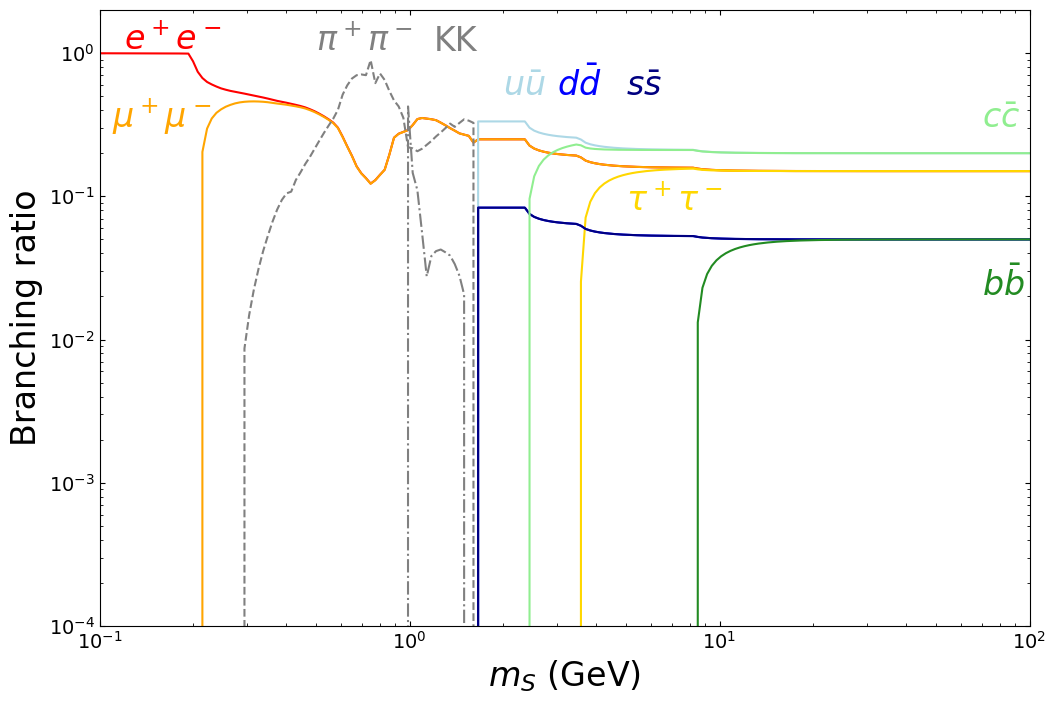

In [5]:
font=24

x=np.logspace(-1,2,200)

fig, ax1 = plt.subplots(figsize=(12,8))

ylist=list(map(lambda t: vector_portal.branching_ratios['e+ e-'](t),x))
ax1.plot(x,ylist,label=r'$e^+ e^-$',color="red")    

ylist=list(map(lambda t: vector_portal.branching_ratios['mu+ mu-'](t),x))
ax1.plot(x,ylist,label=r'$\mu^+ \mu^-$',color="orange")   

ylist=list(map(lambda t: vector_portal.branching_ratios['tau+ tau-'](t),x))
ax1.plot(x,ylist,label=r'$\tau^+ \tau^-$',color="gold")   
 
ylist=list(map(lambda t: vector_portal.branching_ratios['u ubar'](t),x))
ax1.plot(x,ylist,label=r'$u \bar u$',color="lightblue")  

ylist=list(map(lambda t: vector_portal.branching_ratios['d dbar'](t),x))
ax1.plot(x,ylist,label=r'$d \bar d$',color="blue")  

ylist=list(map(lambda t: vector_portal.branching_ratios['s sbar'](t),x))
ax1.plot(x,ylist,label=r'$s \bar s$',color="navy")  

ylist=list(map(lambda t: vector_portal.branching_ratios['c cbar'](t),x))
ax1.plot(x,ylist,label=r'$c \bar c$',color="lightgreen")   

ylist=list(map(lambda t: vector_portal.branching_ratios['b bbar'](t),x))
ax1.plot(x,ylist,label=r'$b \bar b$',color="forestgreen") 

ylist=list(map(lambda t:  (vector_portal.branching_ratios['pi+ pi-'](t)+vector_portal.branching_ratios['pi+ pi- pi0 pi0'](t)+vector_portal.branching_ratios['pi+ pi- pi0'](t)+vector_portal.branching_ratios['pi+ pi- pi+ pi-'](t)),x))
ax1.plot(x,ylist,"--",label="pi pi",color="gray")

ylist=list(map(lambda t:  vector_portal.branching_ratios['K+ K-'](t),x)) #+vector_portal.branching_ratios['K0 K0bar'](t)),x))
ax1.plot(x,ylist,"-.",label="K K",color="gray")

ax1.set_xlabel(r"$m_S$ (GeV)",fontsize=font)
ax1.set_ylabel("Branching ratio",fontsize=font)    
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([1e-4,2])
ax1.set_xlim([1e-1,1e2])

ax1.tick_params(
    direction='in',
    axis='both',          
    which='both',      
    top=True, 
    right=True)


ax1.text(0.12,1.05,r'$e^+ e^-$',color="red",fontsize=font)    
ax1.text(0.11,0.3,r'$\mu^+ \mu^-$',color="orange",fontsize=font)   
ax1.text(5,8e-2,r'$\tau^+ \tau^-$',color="gold",fontsize=font)   

ax1.text(2,5e-1,r'$u \bar u$',color="lightblue",fontsize=font)   
ax1.text(3,5e-1,r'$d \bar d$',color="blue",fontsize=font)   
ax1.text(5,5e-1,r'$s \bar s$',color="navy",fontsize=font)  

ax1.text(70,3e-1,r'$c \bar c$',color="lightgreen",fontsize=font)   
ax1.text(70,2e-2,r'$b \bar b$',color="forestgreen",fontsize=font) 

#ax1.text(0.12,4.4e-3,r'$\gamma\gamma$',color="firebrick",fontsize=font) 

ax1.text(1.2,1.04,r'KK',color="gray",fontsize=font) 
ax1.text(0.5,1.04,r'$\pi^+ \pi^-$',color="gray",fontsize=font) 

We can plot the lifetime as a function of the mass, fixing the mixing angle with the higgs to a reference value. The function is used as follows 

In [6]:
m_test=1.0 # in units of GeV
stheta_test=1e-4 # dimensionless mixing angle
vector_portal.ctau(m_test,stheta_test) # ctau in units of cm

0.00023848777489238277

(1e-08, 1000.0)

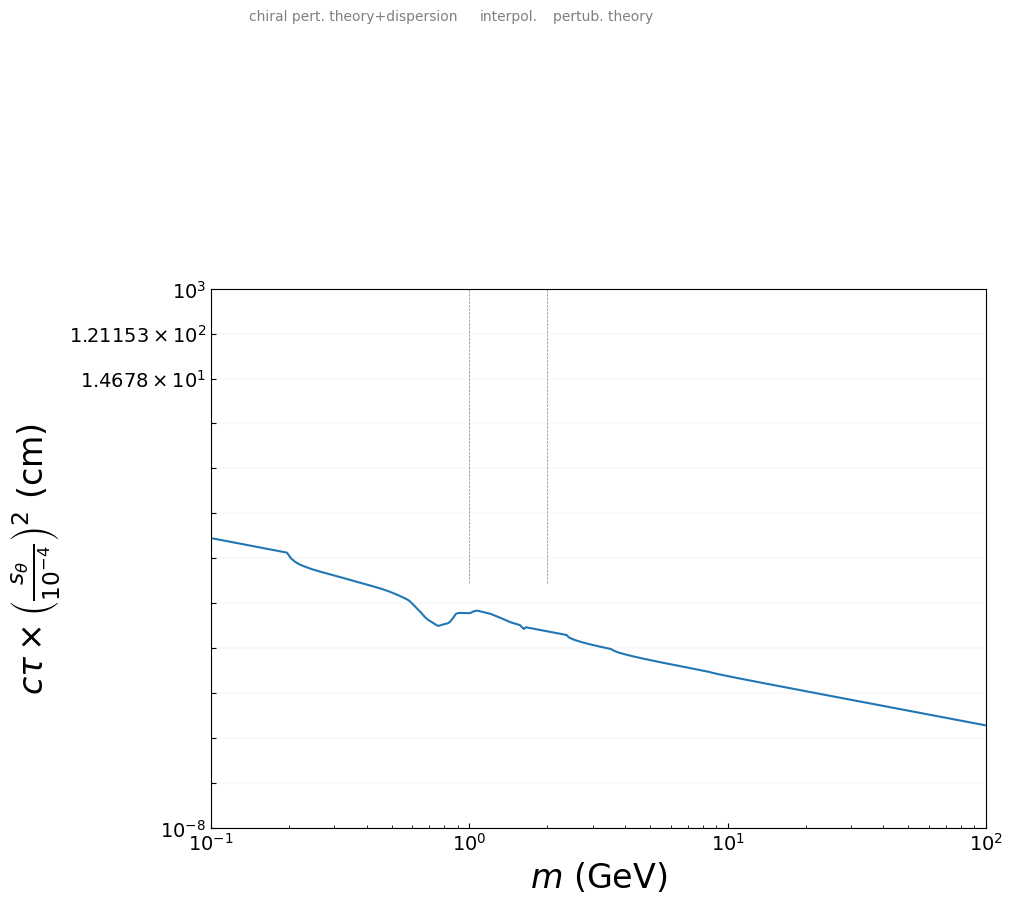

In [7]:
#For the conventions used for the various models we refer to paper. We can plot the lifetime

font=24
#ticklabels=["$10^{-3}$", "", "$10^{-1}$", "", "$10^{1}$", "", "$10^{3}$","", "$10^{5}$", "",
#            "$10^{7}$", "", "$10^{9}$"]

x=np.logspace(-1,2,400)
ymine=list(map(lambda t: vector_portal.ctau(t,1e-4),x))

from matplotlib import gridspec

fig = plt.figure(figsize=(10, 7)) 
gs = gridspec.GridSpec(1,1) 
ax1 = plt.subplot(gs[0])

ax1.plot(x,ymine)
ax1.set_xlabel(r"$m$ (GeV)",fontsize=font)
ax1.set_ylabel(r"$c\tau\times \left(\frac{s_\theta}{10^{-4}}\right)^2$ (cm)",fontsize=font)
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.plot([1.0,1.0],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.plot([2,2],[1e-3,1e9],"--",color="gray",linewidth=0.5)
ax1.text(0.9,3e8,"chiral pert. theory+dispersion",color='gray',fontsize=10,horizontalalignment="right")
ax1.text(1.1,3e8,"interpol.",color='gray',fontsize=10,horizontalalignment="left")
ax1.text(2.1,3e8,"pertub. theory",color='gray',fontsize=10,horizontalalignment="left")
ax1.set_yticks(np.logspace(-8,3,13))
#ax1.set_yticklabels(ticklabels,fontsize=22)
ax1.grid(axis="y",linewidth=0.1)

ax1.set_xlim([1e-1,1e2])
ax1.set_ylim([1e-8,1e3])

The low energy spectrum of the simplified dark sector model consists out of a dark pion and a dark rho. Dark baryons are neglected. The other parameters are:
- dark confinement scale, \Lambda, which is the energy where the parton shower stops and hadronization begins.
- number of colors, Nc, which largely just affects the shape of the parton shower.
- number of flavors, Nf. For Nf=1, there are no "charged" pions, and all pions can in principle decay. Models with Nf>1 will have "charged" pions, like in the standard model, which are taken to be stable. Such models have more MET. (semi-visible jets) 

The flags that can be specified are the following:
- m: mass of the dark pion ($\tilde \eta$), in GeV
- xi_omega: $m_{\tilde \omega}$/$m_{\tilde \eta}$. We expect this parameter to be xi_omega>1
- xi_Lambda: ${\tilde \Lambda}$/$m_{\tilde \eta}$. We expect this parameter to be xi_Lambda>1
- ctau: proper lifetime of the unstable meson, in cm. For the vector portal the $\tilde{\omega}$ is unstable, for the higgs, gluon and photon portals this refers to the lifetime of the $\tilde{\eta}$. For the dark photon portal, this parameter sets the lifetime of the dark photon ($A'$).
- Nc: number of colors in dark sector, should be positive integer
- Nf: number of flavors in dark sector, should be positive integer
- mH: mass of the heavy particle (e.g. Higgs) that decays into the dark sector. Production through gluon fusion is assumed.
- mayDecay: allow the hidden sector particles to decay. Default is "True", "False" is useful for debugging mostly, or for performing certain truthlevel studies. 
- userName: name of person generating the pythia card

The function will print a warning if the lifetime is too low to be theoretically well motivated.

In [8]:
# writing out a pythia card

masses = [1,2,3,5,10]
ctau=10

def to_cm(mm):
    return mm/10.

for mass in masses:
    
    vector_portal.pythia_card("vector_m-{}_ctau-{}.cmnd".format(mass,ctau),
                             m=mass,
                             xi_omega=1.0,
                             xi_Lambda=1.0,
                             ctau=to_cm(ctau), #takes in cm
                             Nc=3,
                             Nf=1,
                             mH=125,
                             mayDecay=True,
                             userName="Albert Einstein")